In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import linear_model
from IPython.display import display
import statsmodels.formula.api as smf

%matplotlib inline

pd.options.display.float_format = '{:.3f}'.format

In [71]:
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [72]:
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-squared: \n', regr.score(X, Y))

Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]
Intercept: 
 [ 2.93888937]
R-squared: 
 0.897210638179


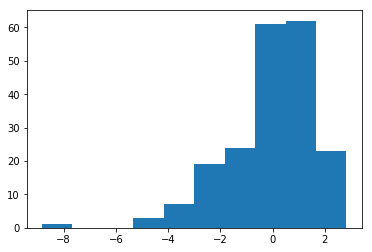

In [73]:
predicted = regr.predict(X).ravel()
actual = data['Sales']
residual = actual - predicted
plt.hist(residual)
plt.show()

In [74]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900


In [75]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [76]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.100,37.800,69.200,22.100
1,44.500,39.300,45.100,10.400
2,17.200,45.900,69.300,9.300
3,151.500,41.300,58.500,18.500
4,180.800,10.800,58.400,12.900


In [77]:
data2 = data.copy()

In [79]:
data2['Radio'].replace(0.000, 1.0, inplace=True)
data2.describe()

,TV,Radio,Newspaper,Sales
count,200.000,200.000,200.000,200.000
mean,147.042,23.269,30.554,14.023
std,85.854,14.839,21.779,5.217
min,0.700,0.300,0.300,1.600
25%,74.375,9.975,12.750,10.375
50%,149.750,22.900,25.750,12.900
75%,218.825,36.525,45.100,17.400
max,296.400,49.600,114.000,27.000


In [80]:
for col in data2.columns:
    data2[col + '_proc'] = [math.log(data2[col][i]) for i in range(0, len(data2[col]))]
data2.head()    

,TV,Radio,Newspaper,Sales,TV_proc,Radio_proc,Newspaper_proc,Sales_proc
0,230.100,37.800,69.200,22.100,5.439,3.632,4.237,3.096
1,44.500,39.300,45.100,10.400,3.795,3.671,3.809,2.342
2,17.200,45.900,69.300,9.300,2.845,3.826,4.238,2.230
3,151.500,41.300,58.500,18.500,5.021,3.721,4.069,2.918
4,180.800,10.800,58.400,12.900,5.197,2.380,4.067,2.557


In [82]:
Xa = data2[['TV_proc', 'Radio_proc', 'Newspaper_proc']]
Ya = data2['Sales_proc']

In [83]:
regr.fit(Xa, Ya)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [84]:
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-squared: \n', regr.score(Xa, Ya))

Coefficients: 
 [ 0.34961145  0.16933584  0.0155632 ]
Intercept: 
 0.411014358544
R-squared: 
 0.931395281675


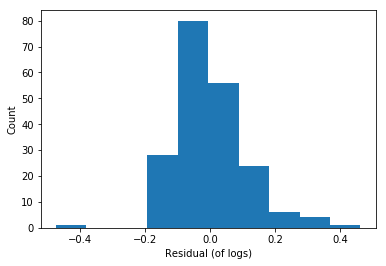

In [85]:
predicted2 = regr.predict(Xa).ravel()
actual2 = data2['Sales_proc']

residual2 = actual2 - predicted2

plt.hist(residual2)
plt.xlabel('Residual (of logs)')
plt.ylabel('Count')
plt.show()

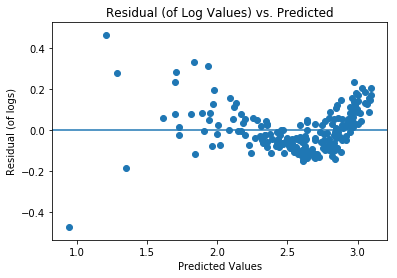

In [86]:
plt.scatter(predicted2, residual2)
plt.xlabel('Predicted Values')
plt.ylabel('Residual (of logs)')
plt.axhline(y=0)
plt.title('Residual (of Log Values) vs. Predicted')
plt.show()